# Análise e Previsão por Regressão Linear do  Preço do Bitcoin
## Coeficientes Ajustados por um Algoritmo Genético

Documento criado por <b>Rodrigo Vertulo</b> em 11 de Novembro de 2019.

Neste documento será apresentada uma análise do preço da criptomoeda Bitcoin no período de 01/09/2019 até 11/11/2019 utilizando um modelo de Regressão Linear Simples com coeficientes ajustados por meio de um Algoritmo Genético. O principal objetico deste pequeno projeto é o estudo da utilização dos recursos básicos da biblioteca Pandas em conjunto com a biblioteca PyGARV para a criação de algoritmos genéticos.

A primeira etapa do projeto consiste em importar as bibliotecas necessárias para o trabalho.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PyGARV import *
import math

A primeira linha do código acima indica que os gráficos gerados com o uso da biblioteca matplotlib serão exibidos anexados dentro deste documento e não em uma noja janela.

Agora é preciso carregar o dataset contendo os dados que serão analisados.

In [2]:
precos = pd.read_csv('dataset_btc_01-09_11-11.csv')

Vamos dar uma olhada no conteúdo do arquivo de dados exibindo as 10 primeiras linhas do mesmo.

In [3]:
precos.head(10)

,id,valor
0,1,9055.53
1,2,8813.58
2,3,8804.88
3,4,9267.56
4,5,9360.88
5,6,9342.53
6,7,9412.61
7,8,9235.35
8,9,9324.72
9,10,9261.10


Podemos observar que o arquivo é formado por duas colunas, uma chamada "id" e outra "valor". A coluna "id" não será necessária para essa análise inicial, de modo que ela será removida.

In [4]:
precos.drop("id", axis=1, inplace=True)
precos.head(10)

,valor
0,9055.53
1,8813.58
2,8804.88
3,9267.56
4,9360.88
5,9342.53
6,9412.61
7,9235.35
8,9324.72
9,9261.10


Agora vamos observar algumas informações estatísticas sobre a coluna "valor" do dataset.

In [5]:
precos.describe()

,valor
count,70.000000
mean,9121.201571
std,935.699982
min,7493.490000
25%,8247.402500
50%,9202.655000
75%,10162.772500
max,10623.540000


Vamos ver como a biblioteca Pandas está tratando o tipo de dado da coluna "valor".

In [6]:
precos.dtypes

valor    float64
dtype: object

Também é possível verificar as dimensões do dataset, ou seja, a quantidade de linhas e colunas do mesmo.

In [7]:
precos.shape

(71, 1)

Apenas como exemplo, vou alterar o nome da coluna "valor" para "Preço".

In [8]:
precos.columns = ["Preço"]

In [9]:
precos.head(10)

,Preço
0,9055.53
1,8813.58
2,8804.88
3,9267.56
4,9360.88
5,9342.53
6,9412.61
7,9235.35
8,9324.72
9,9261.10


Valores nulos podem causar problemas durante as análises, portanto, é preciso verificar se existe alguma linha da coluna "Preço" com valor nulo.

In [10]:
precos[precos["Preço"].isnull()]

,Preço
31,NaN


A linha 31 possui um valor nulo e isso não é bom. Para que não haja problemas durante a análise, será inserido o preço médio no lugar. Primeiro o valor do preço médio será armazenado em uma variável chamada "precoMedio".

In [11]:
precoMedio = precos["Preço"].mean()
precoMedio

9121.201571428572

Agora o "precoMedio" será inserido na linha 31 da coluna "Preço" (que é a coluna zero deste dataset).

In [12]:
precos.iat[31, 0] = precoMedio

Agora é possível verificar que o preço médio foi inserido corretamente na linha 31.

In [13]:
precos.head(40)

,Preço
0,9055.530000
1,8813.580000
2,8804.880000
3,9267.560000
4,9360.880000
5,9342.530000
6,9412.610000
7,9235.350000
8,9324.720000
9,9261.100000


O dataset informa os preços do mais recente (11/11/2019) até o mais antigo (01/09/2019). Para traçar um gráfico da evolução dos preços será preciso inverter essa ordem, ou seja, mostrando de Setembro até Novembro de 2019.

In [14]:
precos = precos.iloc[::-1]

In [15]:
precos.head(40)

,Preço
70,9757.970000
69,10346.760000
68,10623.540000
67,10594.490000
66,10575.530000
65,10353.300000
64,10517.250000
63,10441.280000
62,10334.970000
61,10115.980000


É possível observar acima que a indexação do dataset não está da forma desejada. O ideal é que após a reversão dos dados os índices continuem sendo apresentados de forma crescente. Vamos dar um jeito nisso.

In [16]:
precos = precos.reset_index(drop=True)

Agora é possível traçar um gráfico de linhas de forma muito simples.

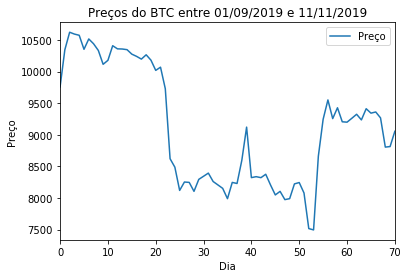

In [17]:
precos.plot()
plt.title("Preços do BTC entre 01/09/2019 e 11/11/2019")
plt.xlabel("Dia")
plt.ylabel("Preço")
plt.show()

Para a criação da Regressão Linear, é mais interessante exibir os dados em um gráfico do tipo "scatter".

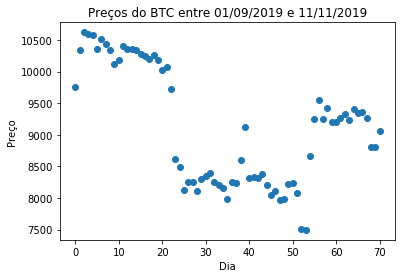

In [18]:
plt.scatter(np.arange(len(precos)), precos.iloc[::1])
plt.title("Preços do BTC entre 01/09/2019 e 11/11/2019")
plt.xlabel("Dia")
plt.ylabel("Preço")
plt.show()

Com o dataset "preparado" é possível criar a classe que implementará o algoritmo genético para a criação do modelo de regressão linear.

In [19]:
class RegLinearBTC(PyGARV):
    def __init__(self, precos):
        super().__init__(popSize=30,
                         values=3,
                         mutationRate=0.15,
                         fullMutation=True,
                         symmetricCut=False,
                         digits=8)
        
        self.precos = precos
        
    def fitness(self, cromossomo):
        b0 = cromossomo[0] / 100
        
        sinalb1 = -1 if cromossomo[1] % 2 == 0 else 1
        b1 = sinalb1 * (cromossomo[2] / 100)

        err = self.erro(b0, b1)
        nota =  1000000000 - err
            
        if nota <= 0:
            nota = 0.001
            
        return [cromossomo, nota]
        
    def finishedGA(self, melhorCromossomo):
        self.b0 = melhorCromossomo[0] / 100
        
        sinalb1 = -1 if melhorCromossomo[1] % 2 == 0 else 1
        self.b1 = sinalb1 * (melhorCromossomo[2] / 100)

    def erro(self, b0, b1):
        erro = 0
        x = 0
        for i, p in self.precos.iterrows():
            erro = erro + math.sqrt(pow( (b0 + b1 * x) - p["Preço"], 2 ))
            x = x + 1
            
        return erro / x

O algoritmo genético será executado por 300 gerações para encontrar os coeficientes da regressão linear.

In [20]:
pygarv = RegLinearBTC(precos.iloc[::1])
pygarv.runGA(300)

Depois que o algoritmo genético termina a execução de todas as gerações é possível verificar os valores dos coeficientes encontrados por ele.

In [21]:
print("b0: %f    b1:%f" % (pygarv.b0, pygarv.b1))

b0: 10649.600000    b1:-40.960000


Com os coeficientes calculados é possível gerar os valores para a plotagem da reta da regressão linear.

In [22]:
y = []
for x in range(len(precos)):
    y.append(pygarv.b0 + pygarv.b1 * x)

Finalmente é possível traçar o gráfico da regressão linear.

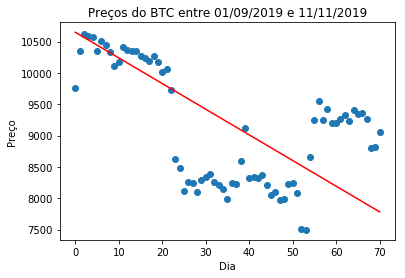

In [23]:
plt.title("Preços do BTC entre 01/09/2019 e 11/11/2019")
plt.xlabel("Dia")
plt.ylabel("Preço")
plt.scatter(np.arange(len(precos)), precos.iloc[::1])
plt.plot(y, color = "r")
plt.show()

A reta da Regressão Linear obtida permite realizar a previsão do preço do Bitcoin para o dia 12/11/2019, ou seja, o dia de número 71 nessa análise.

In [24]:
previsao = pygarv.b0 + pygarv.b1 * 71
print("Previsão do preço do Bitcoin para o dia 12/11/2019: $%f" % (round(previsao, 2)))

Previsão do preço do Bitcoin para o dia 12/11/2019: $7741.440000


Apesar do ajuste da reta da regressão linear parecer bom, é importante ter em mente que há um erro inerente ao modelo. Os pontos do gráfico não são perfeitamente alinhados, de modo que o preço previsto utilizando-se esse modelo fica dentro de uma faixa de valores que pode ser obtida da seguinte forma:

In [27]:
erro = pygarv.erro(pygarv.b0, pygarv.b1)
erro

709.8824164989941

A partir desse valor de erro é possível traçar um novo gráfico contemplando esse desvio.

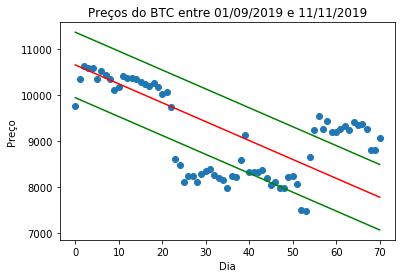

In [29]:
yDesvioAcima = []
for x in range(len(precos)):
    yDesvioAcima.append((pygarv.b0 + pygarv.b1 * x) + erro)
    
yDesvioAbaixo = []
for x in range(len(precos)):
    yDesvioAbaixo.append((pygarv.b0 + pygarv.b1 * x) - erro)
    
plt.title("Preços do BTC entre 01/09/2019 e 11/11/2019")
plt.xlabel("Dia")
plt.ylabel("Preço")
plt.scatter(np.arange(len(precos)), precos.iloc[::1])
plt.plot(y, color = "r")
plt.plot(yDesvioAcima, color = "g")
plt.plot(yDesvioAbaixo, color = "g")
plt.show()

Com essa nova informação é possível definir com um pouco mais de precisão a faixa de valores em que o Bitcoin se encontrará no dia 71.

In [41]:
limiteInferior = previsao - erro
limiteSuperior = previsao + erro
print("Previsão do preço do Bitcoin para o dia 12/11/2019: $%f <= $%f <= $%f" % (round(limiteInferior, 2), 
                                                                                 round(previsao, 2), 
                                                                                 round(limiteSuperior, 2)))

Previsão do preço do Bitcoin para o dia 12/11/2019: $7031.560000 <= $7741.440000 <= $8451.320000


Não podemos esquecer que os valores presentes no dataset apresentam um desvio padrão que pode ser muito útil para refinar a análise da previsão do preço. O desvio padrão pode ser obtido da seguinte forma:

In [36]:
desvioPadrao = precos.std()
desvioPadrao

Preço    928.992369
dtype: float64

Da mesma forma que foi feito com o valor do erro, é possível inserir no gráfico a informação do desvio padrão.

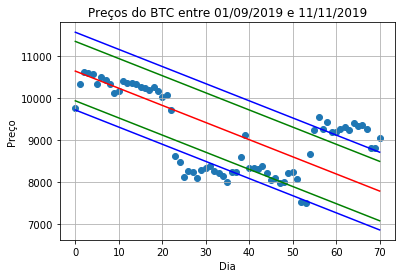

In [40]:
yDesvioPAcima = []
for x in range(len(precos)):
    yDesvioPAcima.append((pygarv.b0 + pygarv.b1 * x) + desvioPadrao)
    
yDesvioPAbaixo = []
for x in range(len(precos)):
    yDesvioPAbaixo.append((pygarv.b0 + pygarv.b1 * x) - desvioPadrao)
    
plt.title("Preços do BTC entre 01/09/2019 e 11/11/2019")
plt.xlabel("Dia")
plt.ylabel("Preço")
plt.scatter(np.arange(len(precos)), precos.iloc[::1])
plt.plot(y, color = "r")
plt.plot(yDesvioPAcima, color = "b")
plt.plot(yDesvioPAbaixo, color = "b")
plt.plot(yDesvioAcima, color = "g")
plt.plot(yDesvioAbaixo, color = "g")
plt.grid()
plt.show()

Agora é possível refinar ainda mais a previsão para o preço do Bitcoin para o dia de número 71.

In [42]:
limiteInferior = previsao - desvioPadrao
limiteSuperior = previsao + desvioPadrao
print("Previsão do preço do Bitcoin para o dia 12/11/2019: $%f <= $%f <= $%f" % (round(limiteInferior, 2), 
                                                                                 round(previsao, 2), 
                                                                                 round(limiteSuperior, 2)))

Previsão do preço do Bitcoin para o dia 12/11/2019: $6812.450000 <= $7741.440000 <= $8670.430000


## Conclusão

De posse de todos esses dados agora é possível fazer uma análise um pouco mais racional sobre o que pode acontecer com o preço do Bitcoin a partir do dia 12/11/2019. Vale lembrar que essa avaliação não é recomendação de compra ou venda do ativo, sendo apenas conclusões pessoais obtidas a partir desse estudo.

Pelos resultado obtidos é possível afirmar que o ativo se encontra em uma clara tendência de baixa, tendo em vista a inclinação negativa da reta da regressão linear. Também é possível acreditar que essa tendência se manterá enquanto o valor da moeda se mantiver abaixo USD8.670,43. Abaixo desse valor há uma forte tendência em o canal de baixa ser respeitado. Preços acima de USD8.670,00 podem indicar uma tentativa de recuperação da moeda, no entanto, enquanto o topo anterior não for vencido (na faixa dos USD9.700,00) a tendência de baixa é mais provável.

Uma venda do ativo poderia ser feita quanto o preço ficar um pouco abaixo de USD8.451,32 e a compra quando ficar um pouco acima de USD7.031,56.